<h1>Импорт библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import matplotlib.patches as patches

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [84]:
def sum_prod(X, V):
    if X.dtype != int or V.dtype != int:
        return "Неправильные матрицы"
    if type(X) != np.ndarray or type(V) != np.ndarray:
        X = np.array(X)
        V = np.array(V)
    summa = sum(X.dot(i) for i in V)
    return summa
print(sum_prod(np.array([[1,9,2], [3, 2, 1], [9, 2, 3]]), np.array([[[1], [2], [3]]])))
print()
print(sum_prod(np.array([[1, 9, 2, 5], [3, 2, 1, 1], [9, 2, 3, 5]]), np.array([[[1], [2], [3],[5]]] )))
print()
print(sum_prod(np.array([["1","9","2"], ["3", "2", "1"], [9, 2, 3]]), np.array([[[1], [2], [3]]])))


[[25]
 [10]
 [22]]

[[50]
 [15]
 [47]]

Неправильные матрицы


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [32]:
def binarize(M, threshold=2):
    if M.dtype != int:
        return "Неправильная матрица"
    size = M.shape
    for height in range(0,size[0]):
        for width in range(0,size[1]):
            if M[height, width] > threshold:
                M[height, width] = 1
            else:
                M[height, width] = 0
    return M

print(binarize(np.array([[1,2,3],[3,2,1]])))
print()
print(binarize(np.array([["а","ьб","б"],["г","2","1"]])))
print()
print(binarize(np.array([[7,2,3],[3,2,1],[3,1,7]])))



[[0 0 1]
 [1 0 0]]

Неправильная матрица

[[1 0 1]
 [1 0 0]
 [1 0 1]]


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [4]:
def unique_rows(mat):
    finalResult = []
    for row in mat:
        result = []
        for num in row:
            if num in result:
                continue
            else:
                result.append(num)
        finalResult.append(result)
    return finalResult

def unique_columns(mat):
    finalResult = []
    size = mat.shape
    for x in range(0, size[1]):
        result =[]
        for y in range(0, size[0]):
            if mat[y,x] in result:
                continue
            else:
                result.append(mat[y,x])
        finalResult.append(result)
    return finalResult

print("Строка",unique_rows(np.array([[1, 2, 3, 3], [4, 4, 5, 6]])))
print("Столбец",unique_columns(np.array([[1, 2, 3, 3], [4, 4, 5, 6], [1, 2, 3, 3],[5, 2, 6, 7]])))
print("Строка",unique_rows(np.array([["a", "v", "v", "c"], ["a", "b", "c", "d"]])))

Строка [[1, 2, 3], [4, 5, 6]]
Столбец [[1, 4, 5], [2, 4], [3, 5, 6], [3, 6, 7]]
Строка [['a', 'v', 'c'], ['a', 'b', 'c', 'd']]


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

[[4 2 6 7]
 [1 9 1 9]
 [9 2 6 7]]
Мат  ожидание строки [4.75 5.   6.  ]
Дисперсия строки [ 3.6875 16.      6.5   ]
Мат  ожидание столбца [4.66666667 4.33333333 4.33333333 7.66666667]
Дисперсия столбца [10.88888889 10.88888889  5.55555556  0.88888889]


'Неправильный размер матриц'

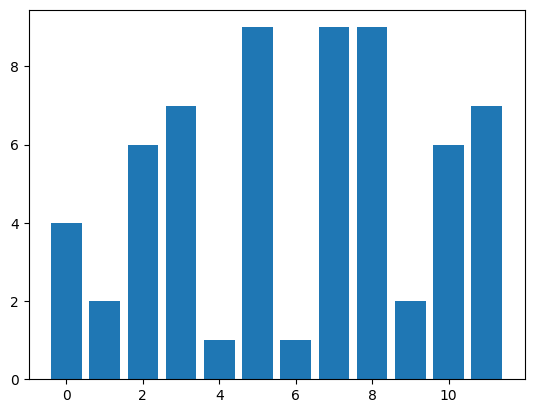

In [28]:
def magic(m,n):
    if m < 0 or n < 0:
        return "Неправильный размер матриц"    
    matrix = np.random.randint(0,10, size=(m, n))
    print(matrix)
    calculate(matrix)
    plot_histograms(matrix)
    return

def calculate(matrix):
    print("Мат  ожидание строки" ,np.mean(matrix, axis = 1))
    print("Дисперсия строки",np.var(matrix, axis = 1))
    print("Мат  ожидание столбца",np.mean(matrix, axis = 0))
    print("Дисперсия столбца", np.var(matrix, axis = 0))

def plot_histograms(matrix):
    x = []
    y = []
    for a in matrix:
        for b in a:
            y.append(b)
    for i in range (0,len(y)):
        x.append(i)
    plt.bar(x,y)

magic(3,4)
magic(-3,4)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [58]:
def chess(m, n, a, b):
    """"" Проверка на тип данных """""
    if (type(m) != int) or (type(n) != int) or (type(a) != int) or (type(b) != int): 
        return "Неправильные условия"
    """"" Проверка на размер """""
    if m < 0 or n < 0:
        return "Неправильный размер" 
    matrix = np.zeros((m, n))
    counter=0
    for height in range(0,m):
        for width in range(0,n):
            if counter % 2 == 0:
                matrix[height, width] = a
            else:
                matrix[height, width] = b
            counter += 1
    return matrix

print(chess(2,3,1,2))
print()
print(chess(5,5,1,2))
print()
print(chess(-5,5,1,2))
print()
print(chess("a",5,1,2))

[[1. 2. 1.]
 [2. 1. 2.]]

[[1. 2. 1. 2. 1.]
 [2. 1. 2. 1. 2.]
 [1. 2. 1. 2. 1.]
 [2. 1. 2. 1. 2.]
 [1. 2. 1. 2. 1.]]

Неправильный размер

Неправильные условия


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


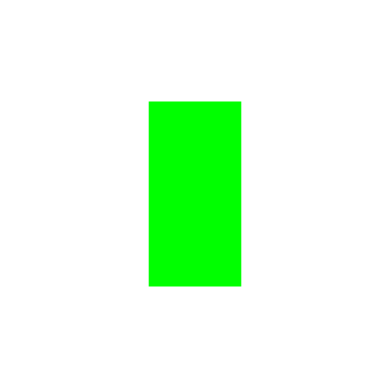

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


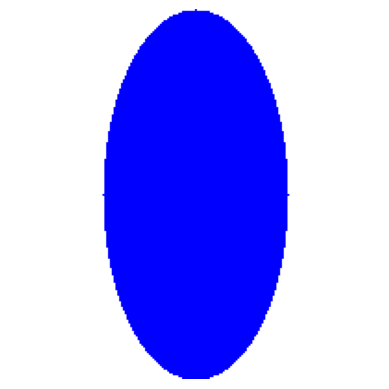

In [30]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    img = np.zeros((m, n, 3))
    img[:, :] = background_color
    x_start = (m - a) // 2
    x_end = x_start + a
    y_start = (n - b) // 2
    y_end = y_start + b
    img[x_start:x_end, y_start:y_end] = rectangle_color
    plt.imshow(img)
    plt.axis('off')
    plt.show()

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    img = np.zeros((m, n, 3))
    img[:, :] = background_color
    x0 = m // 2
    y0 = n // 2
    for x in range(m):
        for y in range(n):
            if ((x - x0) ** 2 / a ** 2 + (y - y0) ** 2 / b ** 2) <= 1:
                img[x, y] = ellipse_color
    plt.imshow(img)
    plt.axis('off')
    plt.show()

a = 100
b = 50
m = 200
n = 200
rectangle_color = [0, 255, 0]
background_color = [155, 255, 255]
draw_rectangle(a, b, m, n, rectangle_color, background_color)

a = 100
b = 50
m = 200
n = 200
ellipse_color = [0, 0, 255]
background_color = [155, 255, 255]
draw_ellipse(a, b, m, n, ellipse_color, background_color)

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [58]:
def magic(time_series, p):
    print("Временной ряд = ", time_series)
    mean = np.mean(time_series)
    print("Математическое ожидание = ", mean)
    variance = np.var(time_series)
    print("Дисперсия = ", variance)
    std = np.std(time_series)
    print("Среднее квадратичное отклонение = ", std)
    minAndMaxs(time_series)
    moving_average(time_series, p)
    print()

def minAndMaxs(time_series):
    length = len(time_series)
    mins = []
    maxs = []
    for i in range(0, length):
        if i == 0:
            if time_series[i] < time_series[i+1]:
                mins.append(time_series[i])
            if time_series[i] > time_series[i+1]:
                maxs.append(time_series[i])
        if i > 0 and i < length - 1:
            if time_series[i] > time_series[i+1] and time_series[i] > time_series[i-1]:
                maxs.append(time_series[i])
            if time_series[i] < time_series[i+1] and time_series[i] < time_series[i-1]:
                mins.append(time_series[i])
        if i == length-1:
            if time_series[i] < time_series[i-1]:
                mins.append(time_series[i])
            if time_series[i] > time_series[i-1]:
                maxs.append(time_series[i])
    print("Минимумы ",mins)
    print("Максимумы ",maxs)

def moving_average(time_series, p):
    result = []
    counter = 0
    summ = 0
    for i in range(0, len(time_series)):
        if counter != p:
            summ += time_series[i]
            counter += 1
        if counter == p:
            result.append(summ / p)
            counter = 0
            sum = 0 
    print("Скользящее среднее ",result)

magic([1, 2, 3, 4, 5, 3], 3)
magic([3, 0, 1, 9, 5, 7, 3], 7)


Временной ряд =  [1, 2, 3, 4, 5, 3]
Математическое ожидание =  3.0
Дисперсия =  1.6666666666666667
Среднее квадратичное отклонение =  1.2909944487358056
Минимумы  [1, 3]
Максимумы  [5]
Скользящее среднее  [2.0, 6.0]

Временной ряд =  [3, 0, 1, 9, 5, 7, 3]
Математическое ожидание =  4.0
Дисперсия =  8.857142857142858
Среднее квадратичное отклонение =  2.9760952365713798
Минимумы  [0, 5, 3]
Максимумы  [3, 9, 7]
Скользящее среднее  [4.0]



<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [113]:
def OHE(vector):
    counter1 = 0
    counter2 = 0
    length = len(vector)
    array = np.zeros((length, length))
    dictionary = {}
    for i in range(0, length):
        if vector[i] not in dictionary:
            dictionary[vector[i]] = counter2
            counter2 +=1
            array[i, dictionary[vector[i]]] = 1
        if vector[i] in dictionary:
            array[i, dictionary[vector[i]]] = 1
    return array

print(OHE([0, 2, 3, 0]))
print()
print(OHE([0, 2, 3, 5 ,4, 5, 6, 7, 0]))

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]

[[1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]]
